In [1]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
import keras
print('tensorflow:',tf.__version__)
print('keras:',keras.__version__)

tensorflow: 2.10.1
keras: 2.10.0


In [3]:
df = pd.read_csv('000001.XSHG.csv', index_col=0)

df[:3]

,open,close,high,low,volume,money
2005-01-04,1260.78,1242.77,1260.78,1238.18,816177000.0,4.418452e+09
2005-01-05,1241.68,1251.94,1258.58,1235.75,867865100.0,4.916589e+09
2005-01-06,1252.49,1239.43,1252.73,1234.24,792225400.0,4.381370e+09


In [4]:
df.shape

(4324, 6)

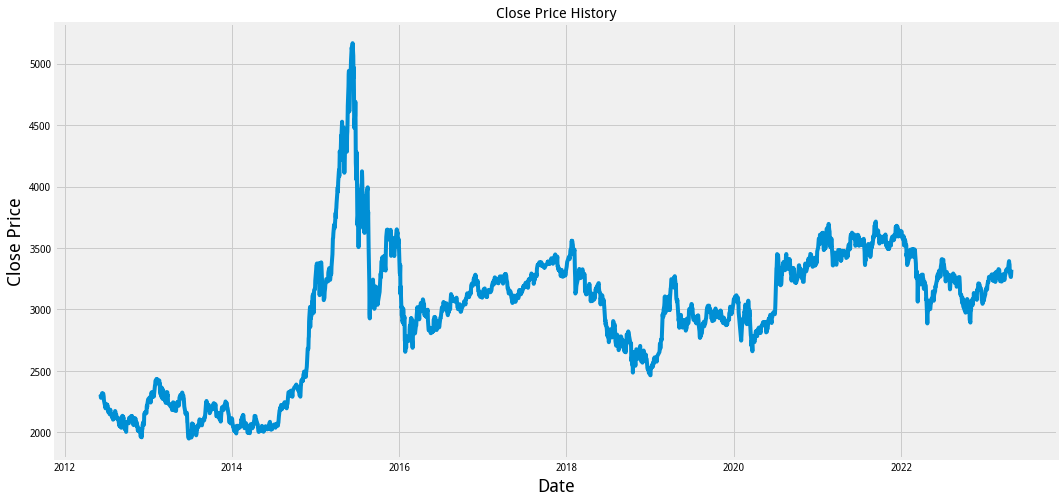

In [5]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [5]:
data = df.filter(['close'])
dataset = data.values
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

3460

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04552057],
       [0.04732549],
       [0.04486316],
       ...,
       [0.40012912],
       [0.39829271],
       [0.3990564 ]])

In [7]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(his_period, len(train_data)):
    x_train.append(train_data[i-his_period:i, 0])
    y_train.append(train_data[i, 0])


In [8]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(3400, 60, 1)

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
#训练 & 保存模型
model.fit(x_train, y_train, batch_size=1, epochs=5)
model.save_weights('000001.XSHG_lstm_model.h5')

Epoch 1/5
3400/3400 [==============================] - 58s 17ms/step - loss: 4.4779e-04
Epoch 2/5
3400/3400 [==============================] - 95s 28ms/step - loss: 2.9948e-04
Epoch 3/5
3400/3400 [==============================] - 145s 43ms/step - loss: 2.5074e-04
Epoch 4/5
3400/3400 [==============================] - 168s 49ms/step - loss: 2.3332e-04
Epoch 5/5
3400/3400 [==============================] - 153s 45ms/step - loss: 2.3312e-04


In [ ]:
#直接载入权重文件即可获得预期结果，不需要进行优化。大部分情况下，模型的效果很好。
model.load_weights("000001.XSHG_lstm_model.h5")

In [ ]:
test_data = scaled_data[training_data_len - his_period:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(his_period, len(test_data)):
    x_test.append(test_data[i-his_period:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse=np.sqrt(((predictions - y_test) ** 2).mean())
rmse

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
new_df = df.tail(60)['close']
new_df.tail()

In [ ]:
last_days = new_df.filter(['close'])[-his_period:].values
last_days_scaled = scaler.transform(last_days)
X_test = []
X_test.append(last_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)